In [5]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/HeisenHeatbath/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/HeisenHeatbath/analysis/Project.toml`
  [13f3f980] CairoMakie v0.15.3
  [780c37f4] Carlo v0.2.4
  [a93c6f00] DataFrames v1.7.0
  [f67ccb44] HDF5 v0.17.2


In [6]:
using CairoMakie
using Carlo.ResultTools
using DataFrames
using HDF5

In [7]:
# Parse DataFrame from ResultTools into more readily useable form
cleandata(filepath::AbstractString) = select(
    DataFrame(ResultTools.dataframe(filepath)),
    [:J, :Lx, :Ly, :T, :H, :Mag, :Energy, :χ],
)

cleandata (generic function with 1 method)

In [8]:
function generatePlot(data::DataFrame, x::Symbol, y::Symbol;
    fig=Figure(), fig_pos=(1,1), title::AbstractString,
    xlabel::AbstractString, ylabel::AbstractString)
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    vals = getfield.(data[:, y], :val)
    errs = getfield.(data[:, y], :err)
    scatter!(data[:, x], vals)
    errorbars!(data[:, x], vals, errs)

    return fig
end

function generatePlot(data::DataFrame, xs::NTuple{N, Symbol}, ys::NTuple{N, Symbol};
    fig=Figure(), fig_pos=(1,1), title::AbstractString,
    xlabel::AbstractString, ylabel::AbstractString) where N
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    for (x, y) in zip(xs, ys)
        vals = getfield.(data[:, y], :val)
        errs = getfield.(data[:, y], :err)
        scatter!(data[:, x], vals)
        errorbars!(data[:, x], vals, errs)
    end

    return fig
end

generatePlot (generic function with 2 methods)

In [16]:
jobname = "test-sweep"
data = cleandata("../jobs/" * jobname * ".results.json")

Row,J,Lx,Ly,T,H,Mag,Energy,χ
,Float64,Int64,Int64,Float64,Float64,Measurem…,Measurem…,Measurem…
1,1.0,20,20,0.1,0.0,0.94577±0.00029,-1.89894±0.0001,0.1921±0.0096
2,1.0,20,20,0.2,0.0,0.8887±0.00052,-1.79464±0.00018,0.378±0.013
3,1.0,20,20,0.3,0.0,0.82832±0.00055,-1.68721±0.00024,0.521±0.023
4,1.0,20,20,0.4,0.0,0.758±0.0018,-1.5733±0.00027,0.948±0.04
5,1.0,20,20,0.5,0.0,0.6828±0.0021,-1.45349±0.00038,1.332±0.084
6,1.0,20,20,0.6,0.0,0.5827±0.003,-1.31858±0.00079,2.36±0.18
7,1.0,20,20,0.7,0.0,0.4167±0.0085,-1.1556±0.0019,5.98±0.43
8,1.0,20,20,0.8,0.0,0.2493±0.0035,-0.9934±0.0011,3.99±0.17
9,1.0,20,20,0.9,0.0,0.176±0.0023,-0.862±0.0012,2.157±0.069


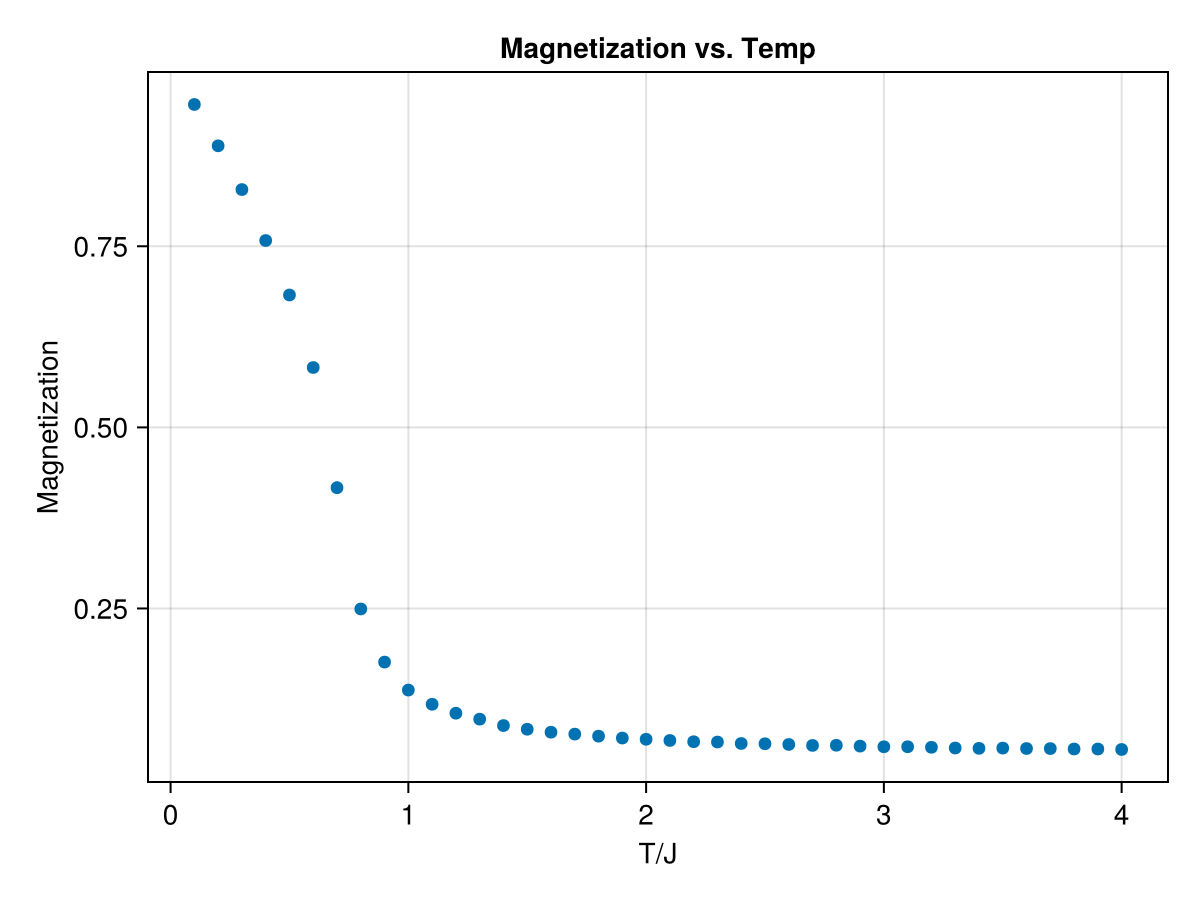

In [17]:
generatePlot(
    data, :T, :Mag,
    title="Magnetization vs. Temp",
    xlabel="T/J",
    ylabel="Magnetization"
)

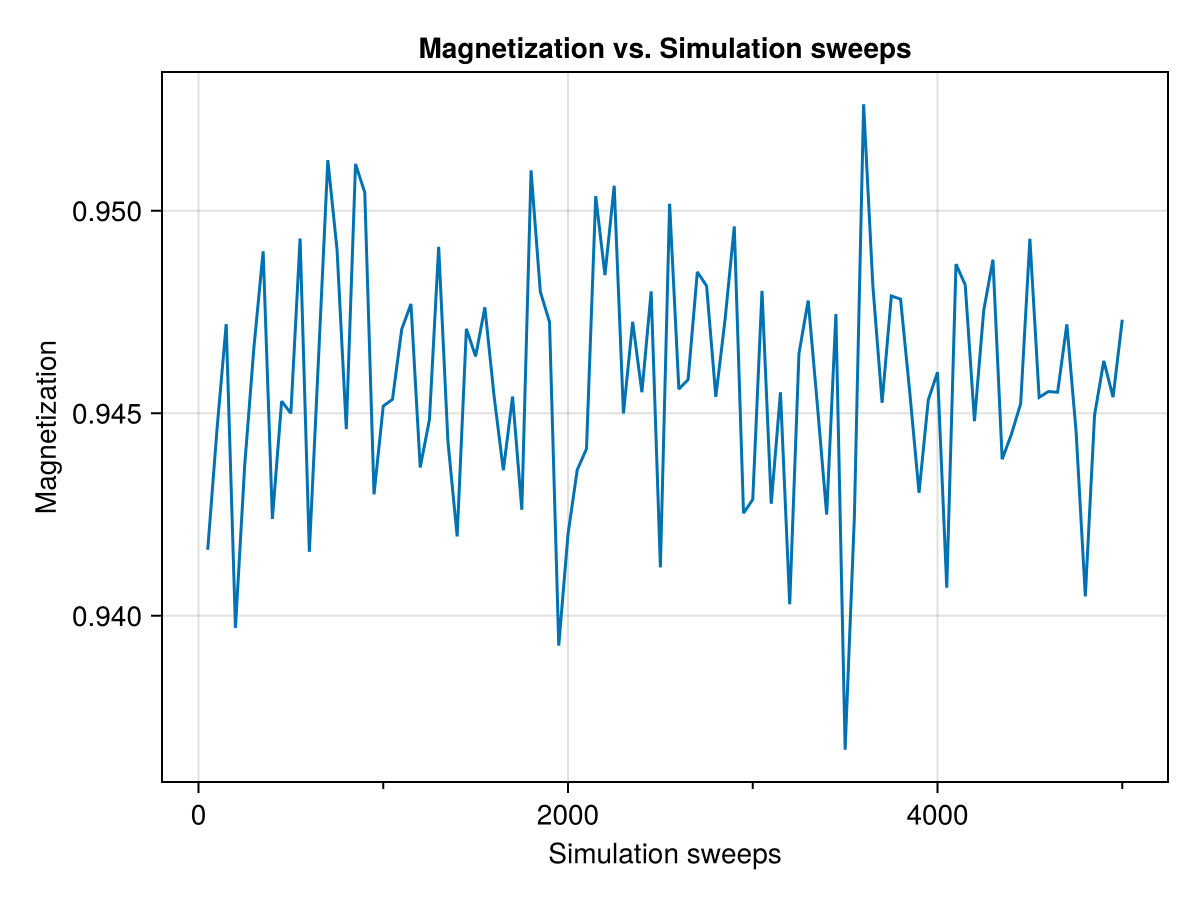

In [15]:
fig = Figure()

ax = fig[1,1] = Axis(
    fig,
    title="Magnetization vs. Simulation sweeps",
    xlabel="Simulation sweeps",
    ylabel="Magnetization",
    xminorticksvisible=true
)

h5open("../jobs/test-sweep.data/task0001/run0001.meas.h5") do file
    mag_group = file["observables/Mag"]
    mag_samples = read(mag_group, "samples")
    bin_len = read(mag_group, "bin_length")
    lines!(
        bin_len .* collect(1:length(mag_samples)),
        mag_samples,
        label="T = 2.2435698905536414"
    )
end

fig